In [15]:
from glucose_dataset import GlucoseDataset
import torch

ds = GlucoseDataset("datasets/diabetes_datasets.zip", sub_directory="Shanghai_T1DM")

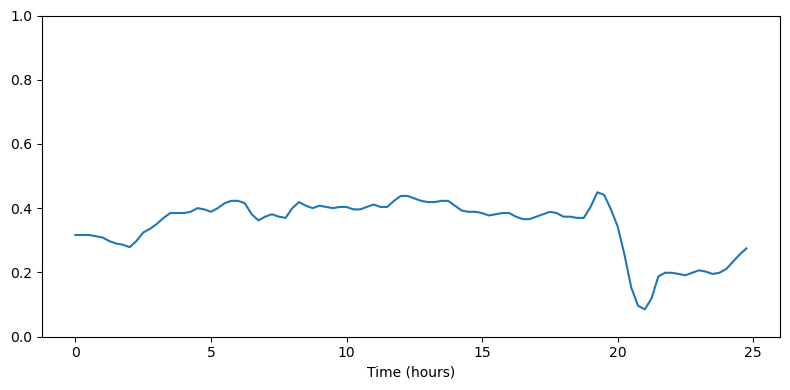

In [16]:
import matplotlib.pyplot as plt
sample_data = ds.__getitem__(0)[:100]
time = torch.arange(0, len(sample_data)) * ds.sample_interval # Samples on 15 minute intervals
plt.figure(figsize=(8,4))
plt.plot(time, sample_data)
plt.xlabel("Time (hours)")
plt.ylim(0, 1)
plt.tight_layout();

In [17]:
import snntorch.spikegen as spikegen
import snntorch.spikeplot as spikeplot

dt = 1e-3
num_steps: int = ds.sample_interval // dt # number of simulation steps per sample
spikes = spikegen.rate(data=sample_data, num_steps=num_steps, gain=1)
spikes = spikes.reshape(-1)

TypeError: repeat(): argument 'repeats' (position 1) must be tuple of ints, but found element of type float at pos 0

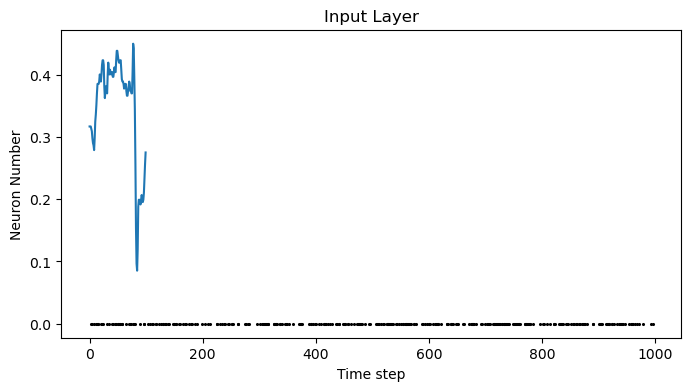

In [ ]:
# raster plot
fig = plt.figure(facecolor="w", figsize=(8, 4))
ax = fig.add_subplot(111)
spikeplot.raster(spikes, ax, s=1.5, c="black")
ax.plot(time * num_steps / ds.sample_interval, sample_data)

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
#plt.ylim(-0.1, 1.1)
plt.show()